# Comparison of Classifiers for Student Performance Prediction

## The dataset


### What is the purpose of the dataset?
This dataset is for creating classification models that will predict the students dropout and their academic success.

### What are the features


Each instance in the dataset represents a student.

### What is the target?

The target is


## Analyzing the dataset

In [58]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [59]:
dataset = pd.read_csv('dataset_student_performance.csv',sep=";")
dataset.info()
#dataframe = pd.DataFrame(dataset)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [60]:
#dataset.head()

## "Data washing"

By looking at the contents of the dataset. We observe that the features are already encoded into integers.
So what we will need to do is 
- Split the features into categorical and numerical features.

After that is done, we will need to 
- Encode the categorical ones differently so they are not integers, we can achieve this by using one hot encoding.

### Splitting the features into categorical and numerical features

By using the dataset.info(), we can see what features are numerical and integer(categorical).
We need to be cautious to not assume all the integers are categorical. For instance, age, is not a catagorical feature even though it's an integer.

The numerical:

- 6,   Previous qualification (grade)                  , float64
- 12,  Admission grade                                 , float64
- 25,  Curricular units 1st sem (grade)                , float64
- 31,  Curricular units 2nd sem (grade)                , float64
- 33,  Unemployment rate                               , float64
- 34,  Inflation rate                                  , float64
- 35,  GDP                                             , float64

The target: 
- 36  Target,  object, which is three categories, encoded as ints. (dropout, enrolled, and graduate)

By inspecting the documentation further, we can now make an overview over what integers are categorical, and which are not.

The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The non categorical: 

- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32  Curricular units 2nd sem (without evaluations), int64  


So, now we can combine them and perphaps group them into the following:


The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The numerical:

- 6,  Previous qualification (grade), float64
- 12, Admission grade, float64
- 25, Curricular units 1st sem (grade), float64
- 31, Curricular units 2nd sem (grade), float64
- 33, Unemployment rate, float64
- 34, Inflation rate, float64
- 35, GDP, float64
- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32, Curricular units 2nd sem (without evaluations), int64  

The target(categorical): 
- 36  Target,  object

In [61]:
#print(dataset.columns.tolist())
#Here we can double check that the syntax of the lists are correct according to the index.
#'Daytime/evening attendance\t' will give an index error if the \t is not included.

In [62]:
categorical_features = [
    "Marital status", "Application mode", "Application order", "Course", 
    "Daytime/evening attendance\t", "Previous qualification", "Nacionality", 
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", "Displaced", "Educational special needs", "Debtor", 
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

numerical_features = [
    "Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", 
    "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", 
    "Age at enrollment", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", 
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", 
    "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", 
    "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", 
    "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (without evaluations)"
]

target = "Target"
dataset_categorical = dataset[categorical_features]
dataset_numerical = dataset[numerical_features]
dataset_target = dataset[target]

<Axes: >

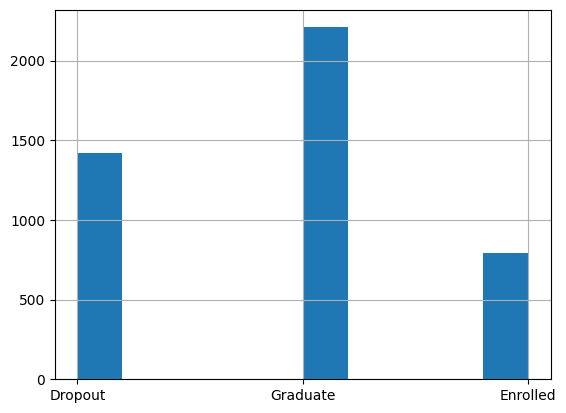

In [63]:
dataset_target.hist()

We need to balance the classes, because we can see that the model will train on more graduate since there is more data in that output?

In [64]:
#dataset_oversampled,_ = SMOTENC('auto').fit_resample(categorical_features, dataset['Target'])
#dataset_oversampled_dataframe = pd.concat


## Making Onehot encoding of the categorical features


In [65]:
dataset_categorical_onehot = pd.get_dummies(dataset_categorical)
#dataset_categorical_onehot.info()

In [66]:
combined_dataset = pd.concat([dataset_numerical, dataset_target, dataset_categorical_onehot], axis=1)
combined_dataset.head()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74,20,0,0,...,12,5,9,1,0,0,1,1,0,0
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79,19,0,6,...,3,3,3,1,0,0,0,1,0,0
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74,19,0,6,...,37,9,9,1,0,0,0,1,0,0
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12,20,0,6,...,37,5,3,1,0,0,1,0,0,0
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79,45,0,6,...,38,9,9,0,0,0,1,0,0,0


## Now lets combine them together again


In [67]:
combined_dataset = pd.concat([dataset_numerical, dataset_target, dataset_categorical_onehot], axis=1)
#combined_dataset.info()

## Creating our split

In [68]:
train_val = combined_dataset.groupby('Target', group_keys=False)[combined_dataset.columns].apply(lambda x: x.sample(frac=0.8))
test_set = combined_dataset.drop(train_val.index)

In [69]:
features = combined_dataset.drop('Target', axis=1)
targets = combined_dataset['Target']

train_val_features = train_val.drop('Target', axis=1)
train_val_targets = train_val['Target']

test_features = test_set.drop('Target', axis=1)
test_targets = test_set['Target']

## Pre-proccessing 

Lets proceed with the dataset now, and see what kind of results it produces. After that we can take pre processing steps to see how it changes the result.
But here we can expand by trying out normalization, PCA, etc.

## Splitting

### Why this split percentage
### Why this sampling technique

## Creating the models


### Evaluation function


In [70]:
'''
def evaluate(model):
    train_probabilities = model.predict_proba(train_val_features)
    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)

    print(f'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training Recall: {recall_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training F1: {f1_score(train_val_targets, train_predictions, average="weighted")}')
    print(f'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="macro", multi_class="ovr")}')

    test_probabilities = model.predict_proba(test_features)
    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)

    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test Recall: {recall_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test F1: {f1_score(test_targets, test_predictions, average="weighted")}')
    print(f'Test ROC AUC: {roc_auc_score(test_targets, test_probabilities, average="macro", multi_class="ovr")}')
    print()
'''
#

'\ndef evaluate(model):\n    train_probabilities = model.predict_proba(train_val_features)\n    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)\n\n    print(f\'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}\')\n    print(f\'Training Precision: {precision_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training Recall: {recall_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training F1: {f1_score(train_val_targets, train_predictions, average="weighted")}\')\n    print(f\'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="macro", multi_class="ovr")}\')\n\n    test_probabilities = model.predict_proba(test_features)\n    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)\n\n    print(f\'Test Accuracy: {accuracy_score(test_targets, test_predictions)}\')\n    print(f\'Test Precision: {precision

In [71]:
def evaluate(model):
    train_probabilities = model.predict_proba(train_val_features)
    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)

    print(f'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training Recall: {recall_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training F1: {f1_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="micro", multi_class="ovr")}')

    test_probabilities = model.predict_proba(test_features)
    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)

    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions, average="micro")}')
    print(f'Test Recall: {recall_score(test_targets, test_predictions, average="micro")}')
    print(f'Test F1: {f1_score(test_targets, test_predictions, average="micro")}')
    print(f'Test ROC AUC: {roc_auc_score(test_targets, test_probabilities, average="micro", multi_class="ovr")}')
    print()


## Tuning the hyperparameters

### Grid search

In [72]:
metrics = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']


## Creating a function for GridSearch

### and creating param grid dictionaries

In [73]:
param_grid_RF = {
        'max_depth': np.arange(1, 15, 5),
        'n_estimators': np.arange(5, 100, 10),
        'max_features': np.arange(0.1, 1.0, 0.05),
        }


param_grid_GB = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 0.25, 0.05),
    'max_depth': np.arange(3, 11, 2)
    }


param_grid_ADA = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 1.1, 0.3),
    'estimator__max_depth': np.arange(1, 6, 2)
    }


param_grid_NB = {
    'var_smoothing': np.logspace(-9, -6, 4)  # 1e-9, 1e-8, 1e-7, 1e-6 ?
    }


In [74]:
def train_grid_search(classifier, parameter_grid, scoring,refit, features, target, cv=5, verbose=1):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=parameter_grid,
        scoring=scoring,
        refit=refit,
        cv=cv,
        verbose=verbose,
        n_jobs=-1
    )

    grid_search.fit(features, target)
    results = pd.DataFrame(grid_search.cv_results_)
    best_model = grid_search.best_estimator_

    print(f"best parameters: {grid_search.best_params_}")
    print(f"best score: {grid_search.best_score_:.4f}")

    return best_model, results

In [75]:
train_grid_search(RandomForestClassifier(),param_grid_RF,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
best parameters: {'max_depth': np.int64(11), 'max_features': np.float64(0.45000000000000007), 'n_estimators': np.int64(45)}
best score: 0.7725


(RandomForestClassifier(max_depth=np.int64(11),
                        max_features=np.float64(0.45000000000000007),
                        n_estimators=np.int64(45)),
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0         0.013223      0.000748         0.028079        0.000000   
 1         0.025017      0.005659         0.033424        0.006008   
 2         0.047736      0.007591         0.029799        0.003190   
 3         0.060657      0.002223         0.036316        0.006228   
 4         0.078578      0.007222         0.029774        0.005006   
 ..             ...           ...              ...             ...   
 535       1.142146      0.019478         0.043993        0.004655   
 536       1.337228      0.018554         0.043272        0.004112   
 537       1.556730      0.015743         0.045913        0.004890   
 538       1.734180      0.026797         0.039619        0.003537   
 539       1.739504      0.110593         0.026632        0.

In [76]:
train_grid_search(GradientBoostingClassifier(),param_grid_GB,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best parameters: {'learning_rate': np.float64(0.11), 'max_depth': np.int64(5), 'n_estimators': np.int64(50)}
best score: 0.7756


(GradientBoostingClassifier(learning_rate=np.float64(0.11),
                            max_depth=np.int64(5), n_estimators=np.int64(50)),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        1.306173      0.015808         0.033389        0.008363   
 1        2.628669      0.029883         0.035933        0.004329   
 2        3.981664      0.060734         0.040359        0.000672   
 3        5.357415      0.057689         0.046900        0.003708   
 4        2.394161      0.030850         0.043265        0.011451   
 ..            ...           ...              ...             ...   
 75      15.475755      0.142104         0.070101        0.005213   
 76       6.359887      0.028198         0.047392        0.003093   
 77      12.782584      0.151414         0.065293        0.002449   
 78      18.447391      0.074513         0.062795        0.005554   
 79      18.986332      1.117828         0.057942        0.008834   
 
     param_learning_rate  param

In [77]:
train_grid_search(AdaBoostClassifier(estimator=DecisionTreeClassifier()),param_grid_ADA,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Stavros\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


best parameters: {'estimator__max_depth': np.int64(1), 'learning_rate': np.float64(0.9099999999999999), 'n_estimators': np.int64(150)}
best score: 0.7629


(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=np.int64(1)),
                    learning_rate=np.float64(0.9099999999999999),
                    n_estimators=np.int64(150)),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        0.424256      0.031238         0.057546        0.002824   
 1        0.819896      0.030702         0.077882        0.007222   
 2        1.230979      0.031272         0.106785        0.007770   
 3        1.617420      0.032428         0.134597        0.009489   
 4        0.409341      0.006496         0.050534        0.000106   
 5        0.814389      0.015432         0.081794        0.006418   
 6        1.252644      0.033644         0.116565        0.006014   
 7        1.675679      0.034086         0.142584        0.003954   
 8        0.424816      0.011809         0.054509        0.004370   
 9        0.888611      0.016812         0.089825        0.004581   
 10       1.314424      0.024847         0.110486

In [78]:
train_grid_search(GaussianNB(),param_grid_NB,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best parameters: {'var_smoothing': np.float64(1e-08)}
best score: 0.6931


(GaussianNB(var_smoothing=np.float64(1e-08)),
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0       0.009204      0.001842         0.035551        0.003831   
 1       0.014844      0.006028         0.030629        0.000895   
 2       0.012026      0.001993         0.026900        0.001074   
 3       0.010597      0.006490         0.021134        0.006441   
 
    param_var_smoothing                    params  split0_test_accuracy  \
 0         1.000000e-09  {'var_smoothing': 1e-09}              0.670904   
 1         1.000000e-08  {'var_smoothing': 1e-08}              0.696328   
 2         1.000000e-07  {'var_smoothing': 1e-07}              0.677966   
 3         1.000000e-06  {'var_smoothing': 1e-06}              0.648305   
 
    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  ...  \
 0              0.690678              0.675141              0.687853  ...   
 1              0.693503              0.676554              0.707627  ...   
 2  

## Creating the classifiers


In [79]:
random_forest_model = RandomForestClassifier(max_depth=11,max_features=0.25,n_estimators=75)
random_forest_model.fit(train_val_features,train_val_targets)

RandomForestClassifier(max_depth=11, max_features=0.25, n_estimators=75)

In [80]:
evaluate(random_forest_model)

Training Accuracy: 0.9361401525854761
Training Precision: 0.9361401525854761
Training Recall: 0.9361401525854761
Training F1: 0.9361401525854761
Training ROC AUC: 0.9876445175029049
Test Accuracy: 0.768361581920904
Test Precision: 0.768361581920904
Test Recall: 0.768361581920904
Test F1: 0.768361581920904
Test ROC AUC: 0.9197912477257493



In [81]:
gradient_booster_model = GradientBoostingClassifier(learning_rate=0.21,max_depth=3,n_estimators=150)
#best parameters: {'learning_rate': np.float64(0.21000000000000002), 'max_depth': np.int64(3), 'n_estimators': np.int64(150)}
gradient_booster_model.fit(train_val_features,train_val_targets)

GradientBoostingClassifier(learning_rate=0.21, n_estimators=150)

In [82]:
evaluate(gradient_booster_model)

Training Accuracy: 0.9205990392766318
Training Precision: 0.9205990392766318
Training Recall: 0.9205990392766318
Training F1: 0.9205990392766318
Training ROC AUC: 0.9857103916389297
Test Accuracy: 0.7864406779661017
Test Precision: 0.7864406779661017
Test Recall: 0.7864406779661017
Test F1: 0.7864406779661017
Test ROC AUC: 0.9204609148073669



In [83]:
ada_booster_model = AdaBoostClassifier(learning_rate=0.61,n_estimators=200) # adding estimator__depth=1 makes things too difficult
#best parameters: {'estimator__max_depth': np.int64(1), 'learning_rate': np.float64(0.61), 'n_estimators': np.int64(200)}

ada_booster_model.fit(train_val_features,train_val_targets)

C:\Users\Stavros\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.61, n_estimators=200)

In [84]:
evaluate(ada_booster_model)

Training Accuracy: 0.783272110765753
Training Precision: 0.783272110765753
Training Recall: 0.783272110765753
Training F1: 0.783272110765753
Training ROC AUC: 0.9019735365528151
Test Accuracy: 0.7649717514124293
Test Precision: 0.7649717514124293
Test Recall: 0.7649717514124293
Test F1: 0.7649717514124293
Test ROC AUC: 0.887873854894826



In [85]:
naive_bayes_model = GaussianNB(var_smoothing=1e-08)
naive_bayes_model.fit(train_val_features,train_val_targets)

GaussianNB(var_smoothing=1e-08)

In [86]:
evaluate(naive_bayes_model)

Training Accuracy: 0.6990675332014693
Training Precision: 0.6990675332014693
Training Recall: 0.6990675332014693
Training F1: 0.6990675332014693
Training ROC AUC: 0.8288560895861805
Test Accuracy: 0.711864406779661
Test Precision: 0.711864406779661
Test Recall: 0.711864406779661
Test F1: 0.711864406779661
Test ROC AUC: 0.8368182833796164



## The results

Random forest:

- Training Accuracy: 0.9355750211924272
- Training Precision: 0.9355750211924272
- Training Recall: 0.9355750211924272
- Training F1: 0.9355750211924272
- Training ROC AUC: 0.986769673666562
- Test Accuracy: 0.7796610169491526
- Test Precision: 0.7796610169491526
- Test Recall: 0.7796610169491526
- Test F1: 0.7796610169491526
- Test ROC AUC: 0.9200555395959016


Gradient booster:

- Training Accuracy: 0.919468776490534
- Training Precision: 0.919468776490534
- Training Recall: 0.919468776490534
- Training F1: 0.919468776490534
- Training ROC AUC: 0.9849100815911443
- Test Accuracy: 0.7706214689265537
- Test Precision: 0.7706214689265537
- Test Recall: 0.7706214689265537
- Test F1: 0.7706214689265537
- Test ROC AUC: 0.9246704331450094

Ada booster:

- Training Accuracy: 0.7855326363379486
- Training Precision: 0.7855326363379486
- Training Recall: 0.7855326363379486
- Training F1: 0.7855326363379486
- Training ROC AUC: 0.8923516516120655
- Test Accuracy: 0.7728813559322034
- Test Precision: 0.7728813559322034
- Test Recall: 0.7728813559322034
- Test F1: 0.7728813559322034
- Test ROC AUC: 0.8779495036547609

GaussianDB:

- Training Accuracy: 0.6908731280022605
- Training Precision: 0.6908731280022605
- Training Recall: 0.6908731280022605
- Training F1: 0.6908731280022605
- Training ROC AUC: 0.8247690270949284
- Test Accuracy: 0.6903954802259887
- Test Precision: 0.6903954802259887
- Test Recall: 0.6903954802259887
- Test F1: 0.6903954802259887
- Test ROC AUC: 0.8304315490440166



## Comparison of the classifiers

based on the results

## Conclusion

## Possible improvements
Using pipeline in the "data washing"
